<a href="https://colab.research.google.com/github/shiissaa/MAT422/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
url= 'https://raw.githubusercontent.com/Kuroy22/MAT422/main/heart_disease_uci.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
#Old Model with Multicollinearity
df2=pd.read_csv(url)
#find and removes null values
df2.dropna(subset=['trestbps'],inplace=True)
df2.dropna(subset=['chol'],inplace=True)
df2.dropna(subset=['fbs'],inplace=True)
df2.dropna(subset=['restecg'],inplace=True)
df2.dropna(subset=['oldpeak'],inplace=True)
df2.dropna(subset=['ca'],inplace=True)
df2.dropna(subset=['thal'],inplace=True)
df2.dropna(subset=['slope'],inplace=True)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


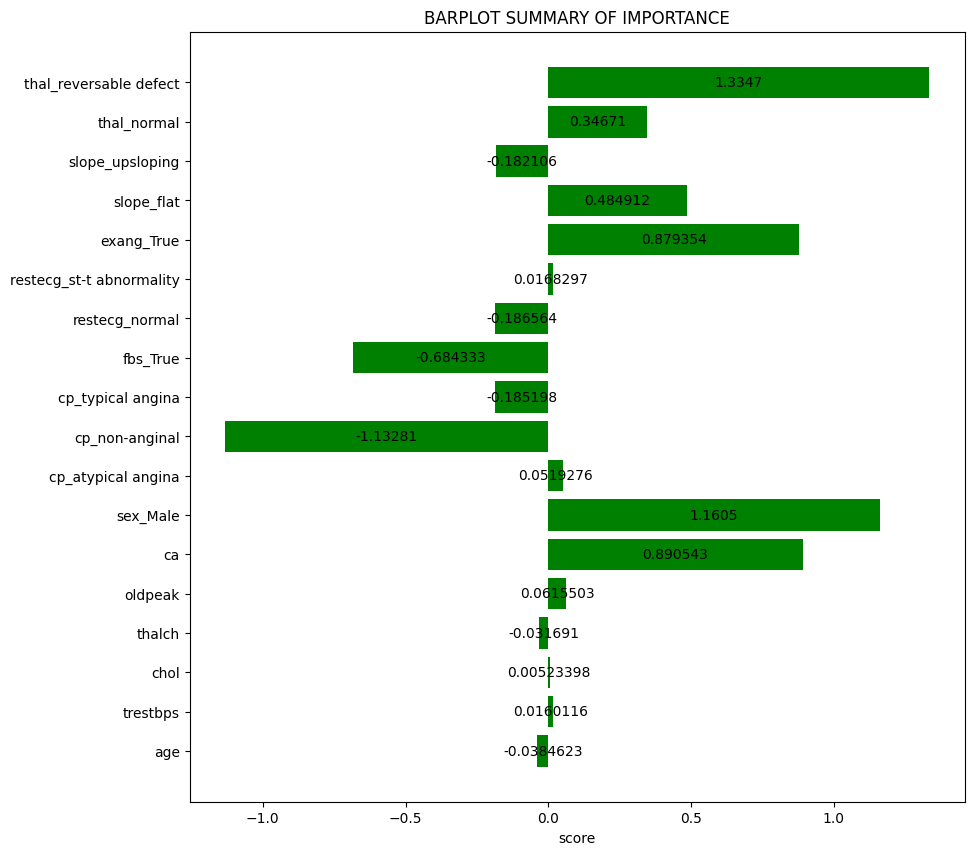

Test Accuracy Score 0.8666666666666667


In [ ]:
#Old Model with Multicollinearity
#create dummy variables
sex=pd.get_dummies(df2['sex'],drop_first=True, prefix= 'sex')
cp=pd.get_dummies(df2['cp'],drop_first=True, prefix='cp')
fbs=pd.get_dummies(df2['fbs'],drop_first=True, prefix='fbs')
restecg=pd.get_dummies(df2['restecg'],drop_first=True, prefix='restecg')
exang=pd.get_dummies(df2['exang'],drop_first=True, prefix='exang')
slope=pd.get_dummies(df2['slope'],drop_first=True, prefix='slope')
thal=pd.get_dummies(df2['thal'],drop_first=True, prefix='thal')
df2.loc[df2["num"]==2] = 1
df2.loc[df2["num"]==3] = 1
df2.loc[df2["num"]==4] = 1
df2.drop(['sex','dataset','cp','fbs','restecg','exang','slope','thal','id'], axis=1, inplace=True)
df2=pd.concat([df2,sex,cp,fbs,restecg,exang,slope,thal], axis=1)
labels=pd.DataFrame(df2['num'])
labels.num[labels.num=='0'] =0
labels.num[labels.num=='1'] =1
labels=labels.apply(pd.to_numeric)
#creates train and test variables from log regression
df2.drop(['num'],axis =1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(
    df2, labels, test_size=.3, random_state=0
)
#performs log regression
logmodel= LogisticRegression(class_weight = 'balanced',solver='liblinear').fit(X_train,y_train)
predictions_log=logmodel.predict(X_test)
importance = logmodel.coef_.flatten()
pyplot.rcParams["figure.figsize"] = (10,10)
ax=pyplot.barh(df2.columns, importance, color='g')
pyplot.title("BARPLOT SUMMARY OF IMPORTANCE")
pyplot.xlabel("score")
pyplot.bar_label(ax,label_type='center')
pyplot.show()
score = logmodel.score(X_test, y_test)
print('Test Accuracy Score', score)

In [ ]:
#check for multicollinearity
#code copied from https://www.tutorialspoint.com/detect-and-treat-multicollinearity-in-regression-with-python#:~:text=Use%20the%20seaborn%20library%20to,larger%20than%205%20or%2010.
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select independent variables - problem! I don't know what variables we actually used
X = df2[['age','trestbps','chol','thalch','oldpeak','ca','sex_Male','cp_atypical angina','cp_non-anginal','cp_typical angina','fbs_True','restecg_normal','restecg_st-t abnormality','exang_True','slope_flat','slope_upsloping','thal_normal','thal_reversable defect']]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF results
print(vif)

    VIF Factor                  features
0    40.420617                       age
1    63.579270                  trestbps
2    27.253806                      chol
3    45.700794                    thalch
4     2.938659                   oldpeak
5     2.270702                        ca
6     3.838240                  sex_Male
7     1.807639        cp_atypical angina
8     2.137006            cp_non-anginal
9     1.380065         cp_typical angina
10    1.232690                  fbs_True
11    2.126754            restecg_normal
12    1.050568  restecg_st-t abnormality
13    2.038235                exang_True
14    5.658240                slope_flat
15    7.556464           slope_upsloping
16    8.370206               thal_normal
17    5.460907    thal_reversable defect


<Axes: >

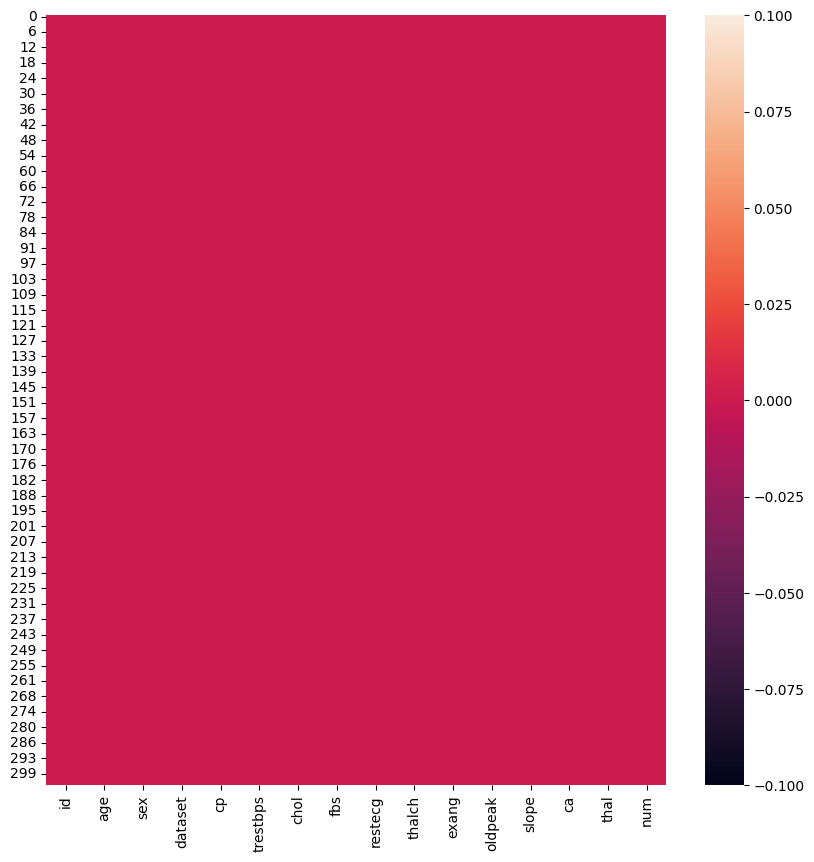

In [ ]:
#Create new model removing variables chol, trestbps, and thalch
#find and removes null values
df.dropna(subset=['trestbps'],inplace=True)
df.dropna(subset=['chol'],inplace=True)
df.dropna(subset=['fbs'],inplace=True)
df.dropna(subset=['restecg'],inplace=True)
df.dropna(subset=['oldpeak'],inplace=True)
df.dropna(subset=['ca'],inplace=True)
df.dropna(subset=['thal'],inplace=True)
df.dropna(subset=['slope'],inplace=True)
sns.heatmap(df.isnull())

In [ ]:
#create dummy variables
sex=pd.get_dummies(df['sex'],drop_first=True, prefix= 'sex')
cp=pd.get_dummies(df['cp'],drop_first=True, prefix='cp')
fbs=pd.get_dummies(df['fbs'],drop_first=True, prefix='fbs')
restecg=pd.get_dummies(df['restecg'],drop_first=True, prefix='restecg')
exang=pd.get_dummies(df['exang'],drop_first=True, prefix='exang')
slope=pd.get_dummies(df['slope'],drop_first=True, prefix='slope')
thal=pd.get_dummies(df['thal'],drop_first=True, prefix='thal')
df.loc[df["num"]==2] = 1
df.loc[df["num"]==3] = 1
df.loc[df["num"]==4] = 1

In [ ]:
df.drop(['sex','dataset','cp','fbs','restecg','exang','slope','thal','id','chol','trestbps','thalch'], axis=1, inplace=True)
df=pd.concat([df,sex,cp,fbs,restecg,exang,slope,thal], axis=1)

In [ ]:
labels=pd.DataFrame(df['num'])
labels.num[labels.num=='0'] =0
labels.num[labels.num=='1'] =1
labels=labels.apply(pd.to_numeric)

In [ ]:
#creates train and test variables from log regression
df.drop(['num'],axis =1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(
    df, labels, test_size=.3, random_state=0
)

In [ ]:
#performs log regression
logmodel= LogisticRegression(class_weight = 'balanced',solver='liblinear').fit(X_train,y_train)
predictions_log=logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
importance = logmodel.coef_.flatten()

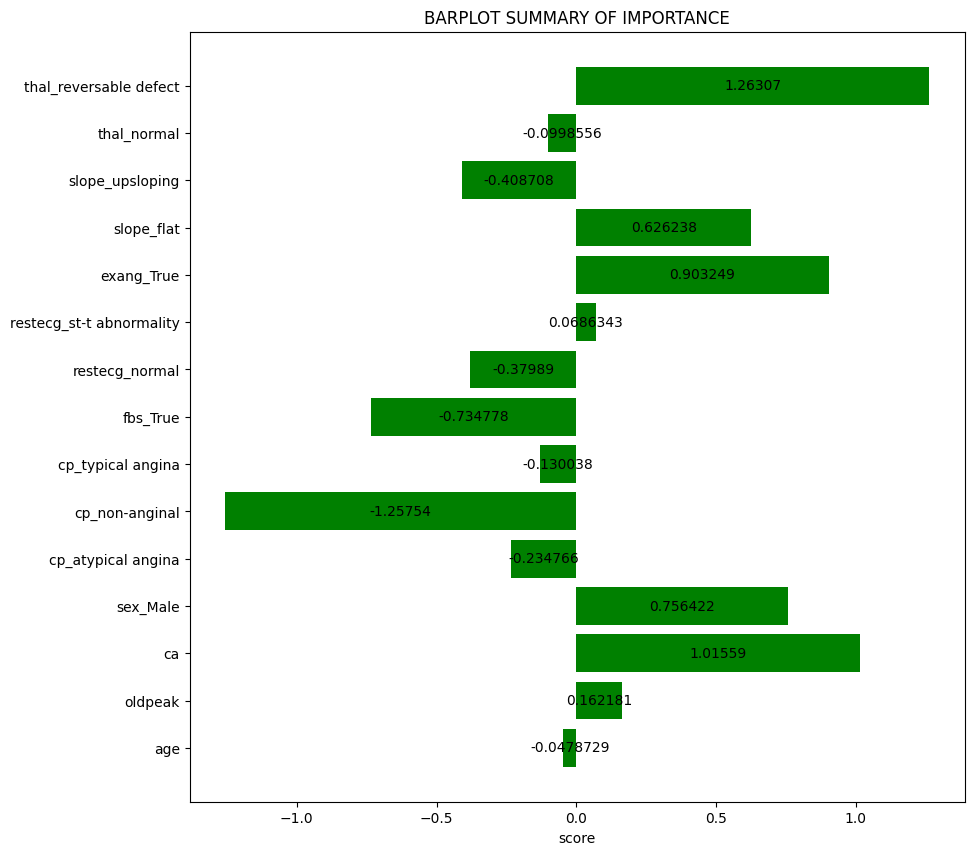

In [ ]:
pyplot.rcParams["figure.figsize"] = (10,10)
ax=pyplot.barh(df.columns, importance, color='g')
pyplot.title("BARPLOT SUMMARY OF IMPORTANCE")
pyplot.xlabel("score")
pyplot.bar_label(ax,label_type='center')
pyplot.show()

In [ ]:
score = logmodel.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.8666666666666667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   oldpeak                   299 non-null    float64
 2   ca                        299 non-null    float64
 3   sex_Male                  299 non-null    uint8  
 4   cp_atypical angina        299 non-null    uint8  
 5   cp_non-anginal            299 non-null    uint8  
 6   cp_typical angina         299 non-null    uint8  
 7   fbs_True                  299 non-null    uint8  
 8   restecg_normal            299 non-null    uint8  
 9   restecg_st-t abnormality  299 non-null    uint8  
 10  exang_True                299 non-null    uint8  
 11  slope_flat                299 non-null    uint8  
 12  slope_upsloping           299 non-null    uint8  
 13  thal_normal               299 non-null    uint8  
 14  thal_rever

In [ ]:
#check for multicollinearity
#code copied from https://www.tutorialspoint.com/detect-and-treat-multicollinearity-in-regression-with-python#:~:text=Use%20the%20seaborn%20library%20to,larger%20than%205%20or%2010.
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select independent variables - problem! I don't know what variables we actually used
X = df[['age','oldpeak','ca','sex_Male','cp_atypical angina','cp_non-anginal','cp_typical angina','fbs_True','restecg_normal','restecg_st-t abnormality','exang_True','slope_flat','slope_upsloping','thal_normal','thal_reversable defect']]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF results
print(vif)

    VIF Factor                  features
0     4.916071                       age
1     2.873386                   oldpeak
2     1.985829                        ca
3     3.557646                  sex_Male
4     1.741927        cp_atypical angina
5     2.092731            cp_non-anginal
6     1.346868         cp_typical angina
7     1.222700                  fbs_True
8     2.084919            restecg_normal
9     1.038566  restecg_st-t abnormality
10    2.008849                exang_True
11    5.644332                slope_flat
12    7.420370           slope_upsloping
13    7.738217               thal_normal
14    5.333908    thal_reversable defect
